In [ ]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5


fatal: destination path 'yolov5' already exists and is not an empty directory.
/content/yolov5


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls /content/drive/MyDrive

 best.pt  'Colab Notebooks'   dataset.zip   test1.jpeg	 test.jpg


In [ ]:
!pip install -U -r requirements.txt



  Using cached numpy-2.0.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)


In [ ]:
%%writefile hyp.aug.custom.yaml
# Training hyperparameters
lr0: 0.01  # initial learning rate
lrf: 0.1  # final learning rate (lr0 * lrf)
momentum: 0.937
weight_decay: 0.0005
warmup_epochs: 3.0
warmup_momentum: 0.8
warmup_bias_lr: 0.1

# Augmentation parameters
hsv_h: 0.015  # image HSV-Hue augmentation (fraction)
hsv_s: 0.7  # image HSV-Saturation augmentation (fraction)
hsv_v: 0.4  # image HSV-Value augmentation (fraction)
degrees: 0.0  # image rotation (+/- deg)
translate: 0.1  # image translation (+/- fraction)
scale: 0.5  # image scale (+/- gain)
shear: 0.0  # image shear (+/- deg)
perspective: 0.0  # image perspective (+/- fraction), range 0-0.001
flipud: 0.0  # image flip up-down (probability)
fliplr: 0.5  # image flip left-right (probability)
mosaic: 1.0  # image mosaic (probability)
mixup: 0.0  # image mixup (probability)
copy_paste: 0.0  # segment copy-paste (probability)

# Anchor parameters
anchor_t: 4.0  # anchor-multiple threshold

# Other parameters
box: 0.05  # box loss gain
cls: 0.5  # cls loss gain
cls_pw: 1.0  # cls BCELoss positive_weight
obj: 1.0  # obj loss gain (scale with pixels)
obj_pw: 1.0  # obj BCELoss positive_weight
iou_t: 0.20  # IoU training threshold
copy_paste: 0.0  # segment copy-paste (probability)

Overwriting hyp.aug.custom.yaml


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving dataset.yaml to dataset.yaml


In [ ]:
!unzip /content/drive/MyDrive/dataset.zip -d /content/dataset


Archive:  /content/drive/MyDrive/dataset.zip
   creating: /content/dataset/train_data/images/
   creating: /content/dataset/train_data/images/train/
  inflating: /content/dataset/train_data/images/train/1.jpg  
  inflating: /content/dataset/train_data/images/train/10.jpg  
  inflating: /content/dataset/train_data/images/train/11.jpg  
  inflating: /content/dataset/train_data/images/train/12.jpg  
  inflating: /content/dataset/train_data/images/train/13.jpg  
  inflating: /content/dataset/train_data/images/train/14.jpg  
  inflating: /content/dataset/train_data/images/train/15.jpg  
  inflating: /content/dataset/train_data/images/train/16.jpg  
  inflating: /content/dataset/train_data/images/train/17.jpg  
  inflating: /content/dataset/train_data/images/train/18.jpg  
  inflating: /content/dataset/train_data/images/train/19.jpg  
  inflating: /content/dataset/train_data/images/train/2.jpg  
  inflating: /content/dataset/train_data/images/train/20.jpg  
  inflating: /content/dataset/trai

In [ ]:
dataset_yaml = """
train: /content/dataset/train_data/images/train
val: /content/dataset/train_data/images/val

nc: 4  # number of classes
names: ['Wind_Mill', 'Sub_station','Brick_Kiln','Solar_Panel']
"""

with open('dataset.yaml', 'w') as f:
    f.write(dataset_yaml)


In [ ]:
!python train.py --img 640 --batch 16 --epochs 150 --data dataset.yaml --cfg models/yolov5l.yaml --weights yolov5l.pt


2024-07-25 19:54:31.621351: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-25 19:54:31.621400: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-25 19:54:31.730962: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5l.pt, cfg=models/yolov5l.yaml, data=dataset.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=150, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, 

In [ ]:
import torch
print(torch.cuda.is_available())


True


In [ ]:
# List the content of the runs/train directory to find the default experiment directory
!ls runs/train/


exp


In [ ]:
# Copy the best.pt file to Google Drive
!cp runs/train/exp/weights/best.pt /content/drive/MyDrive/best.pt


cp: cannot stat 'runs/train/exp/weights/best.pt': No such file or directory


In [ ]:
import torch


model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/drive/MyDrive/best.pt')


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-7-26 Python-3.10.12 torch-2.3.1+cu121 CPU

Fusing layers... 
YOLOv5l summary: 267 layers, 46124433 parameters, 0 gradients, 107.7 GFLOPs
Adding AutoShape... 


In [ ]:
image_path = '/content/drive/MyDrive/test.jpg'
results = model(image_path)

UnidentifiedImageError: cannot identify image file '/content/drive/MyDrive/test.jpg'

In [ ]:
!ls -l /content/drive/MyDrive/test.jpg

-rw------- 1 root root 100887 Jul 25 21:07 /content/drive/MyDrive/test.jpg


In [ ]:
import cv2
import torch

# Load the saved model
model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/drive/MyDrive/best.pt')

image_path = '/content/drive/MyDrive/test.jpg'

# Load the image with OpenCV
img = cv2.imread(image_path)

# Check if the image loaded correctly
if img is not None:
  # Convert from BGR (OpenCV format) to RGB
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  results = model(img)
else:
  print(f"Error: Could not load image from {image_path}")

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-7-26 Python-3.10.12 torch-2.3.1+cu121 CPU

Fusing layers... 
YOLOv5l summary: 267 layers, 46124433 parameters, 0 gradients, 107.7 GFLOPs
Adding AutoShape... 


In [ ]:
image_path = '/content/drive/MyDrive/test.jpg'

# Load the image with OpenCV
img = cv2.imread(image_path)

# Check if the image loaded correctly
if img is not None:
  # Convert from BGR (OpenCV format) to RGB
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  results = model(img)
else:
  print(f"Error: Could not load image from {image_path}")

In [ ]:
%cd yolov5

[Errno 2] No such file or directory: 'yolov5'
/content


image 1/1: 597x833 4 Brick_Kilns
Speed: 4.5ms pre-process, 2292.7ms inference, 1.3ms NMS per image at shape (1, 3, 480, 640)


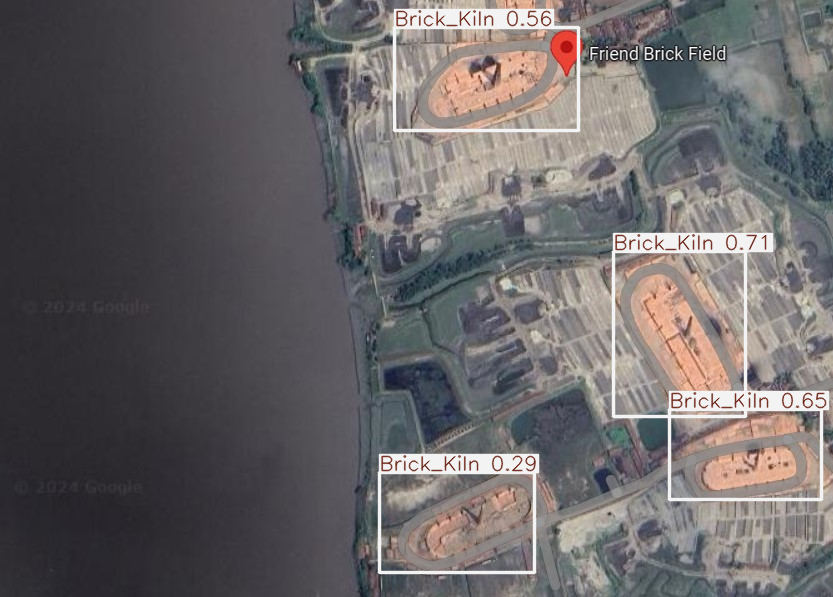

In [ ]:
# Print results
results.print()  # Print results to the console

# Show results
results.show()  # Display the image with bounding boxes




In [ ]:
import cv2
from matplotlib import pyplot as plt

# Load an image
image_path = '/content/drive/MyDrive/test.jpg'
image = cv2.imread(image_path)

# Convert BGR to RGB (OpenCV loads images in BGR format)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the original image
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')
plt.show()

# Apply Gaussian Blur
blurred_image = cv2.GaussianBlur(image_rgb, (5, 5), 0)
plt.imshow(blurred_image)
plt.title('Gaussian Blur')
plt.axis('off')
plt.show()

# Apply Median Filter
median_blurred_image = cv2.medianBlur(image_rgb, 5)
plt.imshow(median_blurred_image)
plt.title('Median Filter')
plt.axis('off')
plt.show()

# Apply Non-Local Means Denoising
denoised_image = cv2.fastNlMeansDenoisingColored(image, None, 10, 10, 7, 21)
denoised_image_rgb = cv2.cvtColor(denoised_image, cv2.COLOR_BGR2RGB)
plt.imshow(denoised_image_rgb)
plt.title('Non-Local Means Denoising')
plt.axis('off')
plt.show()

# Convert to grayscale and apply Canny Edge Detection
gray_image = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)
edges = cv2.Canny(gray_image, 100, 200)
plt.imshow(edges, cmap='gray')
plt.title('Canny Edge Detection')
plt.axis('off')
plt.show()

# Save processed images
cv2.imwrite('blurred_image.jpg', cv2.cvtColor(blurred_image, cv2.COLOR_RGB2BGR))
cv2.imwrite('median_blurred_image.jpg', cv2.cvtColor(median_blurred_image, cv2.COLOR_RGB2BGR))
cv2.imwrite('denoised_image.jpg', cv2.cvtColor(denoised_image, cv2.COLOR_BGR2RGB))
cv2.imwrite('edges.jpg', edges)


True

In [ ]:
!pip install matplotlib

ERROR: Could not find a version that satisfies the requirement opencv (from versions: none)
ERROR: No matching distribution found for opencv


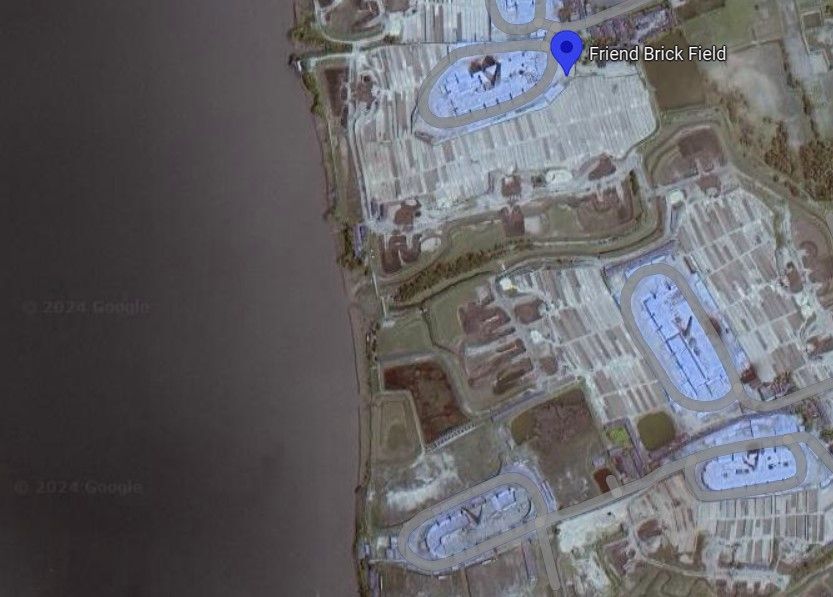

In [ ]:
import cv2
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow # Import cv2_imshow

# Load an image
image_path = '/content/drive/MyDrive/test.jpg'
image = cv2.imread(image_path)

# Check if the image was loaded
if image is None:
    print("Error loading image. Please check the path.")
else:
    # Convert BGR to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    cv2_imshow(image_rgb) # Use cv2_imshow instead of cv2.imshow

    # Display the image using matplotlib
    plt.imshow(image_rgb)
    plt.title('Image')
    plt.axis('off')
    plt.show()


In [ ]:
import cv2
from PIL import Image
import numpy as np

# Load an image
image_path = '/content/drive/MyDrive/test.jpg'
image = cv2.imread(image_path)

# Convert BGR to RGB (OpenCV loads images in BGR format)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Apply Gaussian Blur
blurred_image = cv2.GaussianBlur(image_rgb, (5, 5), 0)

# Apply Median Filter
median_blurred_image = cv2.medianBlur(image_rgb, 5)

# Apply Non-Local Means Denoising
denoised_image = cv2.fastNlMeansDenoisingColored(image, None, 10, 10, 7, 21)
denoised_image_rgb = cv2.cvtColor(denoised_image, cv2.COLOR_BGR2RGB)

# Convert to grayscale and apply Canny Edge Detection
gray_image = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)
edges = cv2.Canny(gray_image, 100, 200)

# Convert OpenCV images to PIL format
def cv2_to_pil(cv2_image):
    return Image.fromarray(cv2_image)

original_image_pil = cv2_to_pil(image_rgb)
blurred_image_pil = cv2_to_pil(blurred_image)
median_blurred_image_pil = cv2_to_pil(median_blurred_image)
denoised_image_pil = cv2_to_pil(denoised_image_rgb)
edges_pil = Image.fromarray(edges)

# Display images
original_image_pil.show(title='Original Image')
blurred_image_pil.show(title='Gaussian Blur')
median_blurred_image_pil.show(title='Median Filter')
denoised_image_pil.show(title='Non-Local Means Denoising')
edges_pil.show(title='Canny Edge Detection')

# Save processed images
blurred_image_pil.save('blurred_image.jpg')
median_blurred_image_pil.save('median_blurred_image.jpg')
denoised_image_pil.save('denoised_image.jpg')
edges_pil.save('edges.jpg')


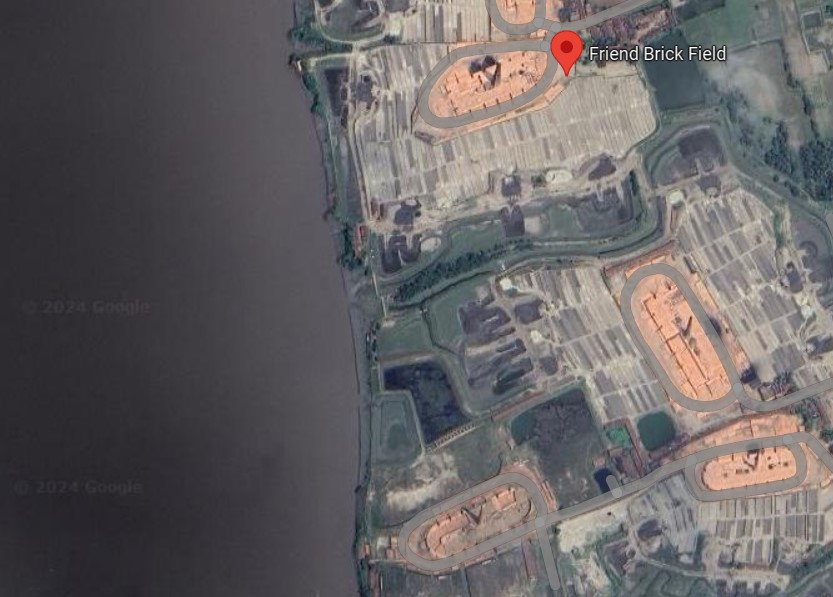

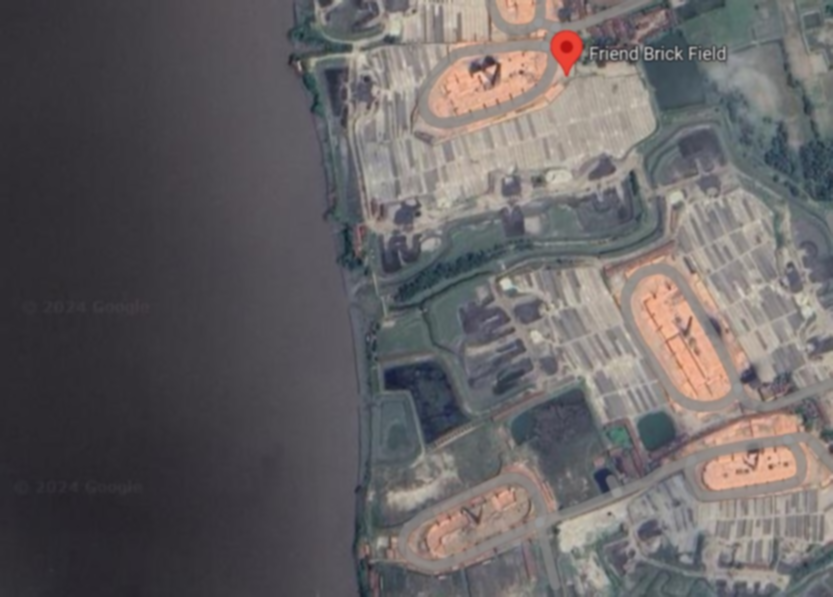

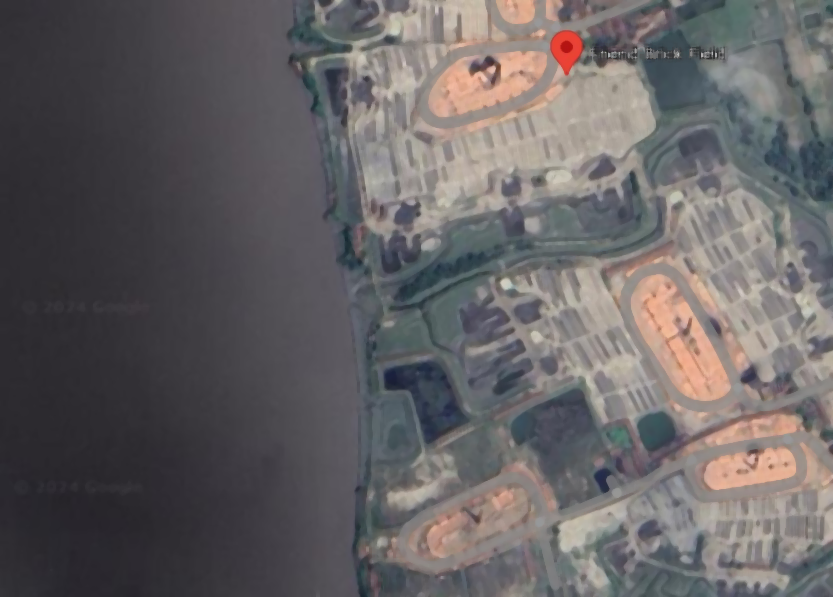

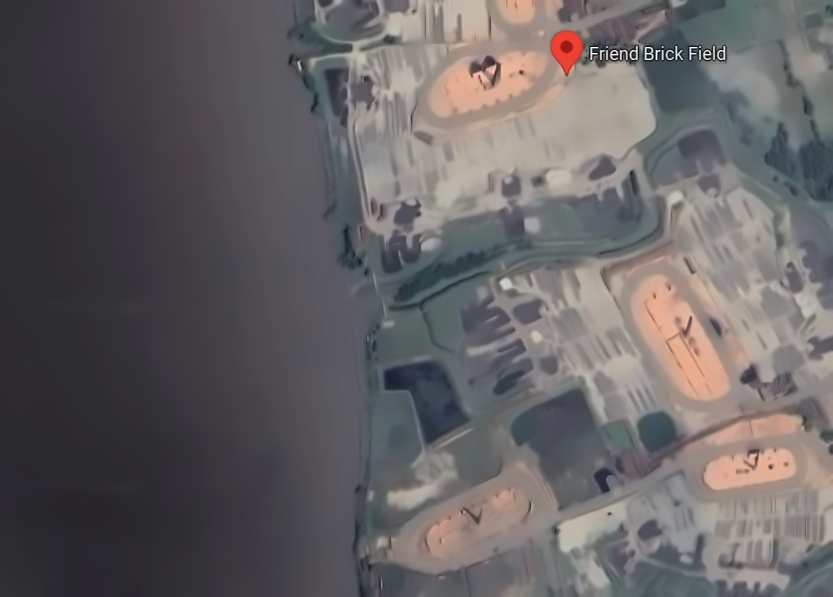

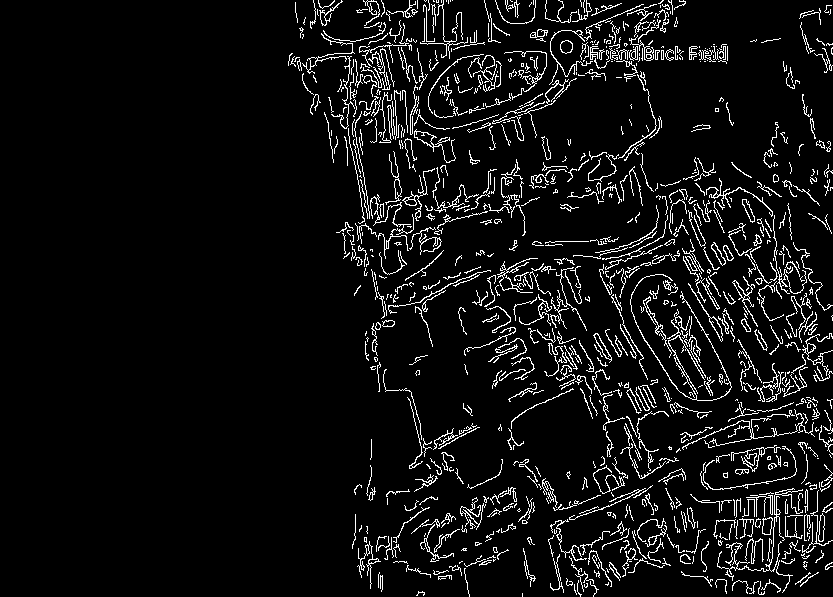

True

In [ ]:
import cv2
from google.colab.patches import cv2_imshow # Import cv2_imshow

# Load an image
image_path = '/content/drive/MyDrive/test.jpg'
image_rgb = cv2.imread(image_path)

# Convert BGR to RGB (OpenCV loads images in BGR format)
#image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the original image
cv2_imshow(image_rgb) # Use cv2_imshow instead of cv2.imshow
cv2.waitKey(0)  # Wait for a key press to continue
cv2.destroyAllWindows()

# Apply Gaussian Blur
blurred_image = cv2.GaussianBlur(image_rgb, (5, 5), 0)
cv2_imshow(blurred_image) # Use cv2_imshow instead of cv2.imshow
cv2.waitKey(0)
cv2.destroyAllWindows()

# Apply Median Filter
median_blurred_image = cv2.medianBlur(image_rgb, 5)
cv2_imshow(median_blurred_image) # Use cv2_imshow instead of cv2.imshow
cv2.waitKey(0)
cv2.destroyAllWindows()

# Apply Non-Local Means Denoising
denoised_image = cv2.fastNlMeansDenoisingColored(image_rgb, None, 10, 10, 7, 21)
denoised_image_rgb = cv2.cvtColor(denoised_image, cv2.COLOR_BGR2RGB)
cv2_imshow(denoised_image) # Use cv2_imshow instead of cv2.imshow
cv2.waitKey(0)
cv2.destroyAllWindows()

# Convert to grayscale and apply Canny Edge Detection
gray_image = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)
edges = cv2.Canny(gray_image, 100, 200)
cv2_imshow(edges) # Use cv2_imshow instead of cv2.imshow
cv2.waitKey(0)
cv2.destroyAllWindows()

# Save processed images
cv2.imwrite('blurred_image.jpg', cv2.cvtColor(blurred_image, cv2.COLOR_RGB2BGR))
cv2.imwrite('median_blurred_image.jpg', cv2.cvtColor(median_blurred_image, cv2.COLOR_RGB2BGR))
cv2.imwrite('denoised_image.jpg', cv2.cvtColor(denoised_image, cv2.COLOR_BGR2RGB))
cv2.imwrite('edges.jpg', edges)